# Imports And Definitions

In [47]:
import string
import nltk
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk.book

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!

In [0]:
def diff(first, second):
    second = set(second)
    return [item for item in first if item not in second]


def pos_tags_dictionary(tokens):
    import nltk
    pos_tags = nltk.pos_tag(tokens)
    tokens_tags = {}
    for token_tag_tuple in pos_tags:
        tokens_tags[token_tag_tuple[0]] = token_tag_tuple[1]

    return tokens_tags

def freq_dist(corpus, n_words=50, plot=True):
    dist = nltk.book.FreqDist(corpus)
    if plot:
        dist.plot(n_words, cumulative=False)

    most_common_tuples = dist.most_common(n_words)
    most_common_words = [word_freq[0] for word_freq in most_common_tuples]

    return most_common_words


def search_index(index, word1, word2):
    result_docs = set()

    word1_docs = index[word1]
    word2_docs = index[word2]

    common_docs = word1_docs.keys() & word2_docs.keys()

    if common_docs:
        for doc_id in common_docs:
            for w1 in word1_docs[doc_id]:
                if not w1[1].startswith('N') and not w1[1].startswith('J'):
                    continue
                for w2 in word2_docs[doc_id]:
                    if not w2[1].startswith('N') and not w2[1].startswith('J'):
                        continue
                    if w1[0] + len(word1) + 1 == w2[0]:
                        result_docs.add((doc_id, w1[0]))

    return result_docs


def clean_and_lemmatize(tokens, tags):
    processed_tokens = tokens

    # clean punctuation
    processed_tokens = diff(processed_tokens, string.punctuation)

    # clean stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    processed_tokens = diff(processed_tokens, stopwords)

    # lemmatize
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_tokens = []
    for token in processed_tokens:
        lemma_tag = nltk.corpus.wordnet.NOUN
        if tags[token].startswith('J'):
            lemma_tag = nltk.corpus.wordnet.ADJ
        elif tags[token].startswith('V'):
            lemma_tag = nltk.corpus.wordnet.VERB
        elif tags[token].startswith('R'):
            lemma_tag = nltk.corpus.wordnet.ADV
        lemmatized_tokens.append(lemmatizer.lemmatize(token, pos=lemma_tag))
    processed_tokens = lemmatized_tokens

    return processed_tokens


def plot_and_diff_most_common_words(tokens1, tokens2):
    tokens1_common_words = freq_dist(tokens1)
    tokens2_common_words = freq_dist(tokens2)

    tokens1_diff = diff(tokens1_common_words, tokens2_common_words)
    print("Words in tokens1 list but not in tokens2 list")
    print(tokens1_diff)
    print()

    tokens2_diff = diff(tokens2_common_words, tokens1_common_words)
    print("Words in tokens2 list but not in tokens1 list")
    print(tokens2_diff)
    print()


def create_pos_index(unique_tokens, documents, documents_tokens, tokens_tags):
    pos_index = {}
    for token in unique_tokens:
        if token not in pos_index:
            pos_index[token] = {}
        for doc_id, doc in enumerate(documents):
            cnt = documents_tokens[doc_id].count(token)
            token_position = -1
            str_position = -1
            for i in range(0, cnt):
                try:
                    token_position = documents_tokens[doc_id].index(token, token_position + 1)
                    str_position = doc.index(token, str_position + 1)
                    while (
                            (doc[str_position - 1] != ' ' and doc[str_position - 1] not in string.punctuation)
                            or
                            (
                                    len(doc) != str_position + len(token) and
                                    doc[str_position + len(token)] != ' ' and
                                    doc[str_position + len(token)] not in string.punctuation
                            )
                    ):
                        str_position = doc.index(token, str_position + 1)

                    if doc_id not in pos_index[token]:
                        pos_index[token][doc_id] = set()
                    pos_index[token][doc_id].add((str_position, tokens_tags[token]))
                except ValueError:
                    pass

    return pos_index

# Tasks

In [0]:
#@markdown ###1. Download the text you selected
file_name = '1056.txt'; # 'Martin Eden' from gutenberg
with open(file_name, 'r') as book_file:
    lines = book_file.read()

In [0]:
#@markdown ###2. Apply word and sentence tokenization 
#@markdown ###7. Split your assigned gutenberg book into paragraphs)
sent_tokens = nltk.tokenize.sent_tokenize(lines)
document_size = 50
documents = [' '.join(sent_tokens[n:n + document_size]) for n in range(0, len(sent_tokens), document_size)]
documents_tokens = [[token for token in nltk.tokenize.word_tokenize(document)] for document in documents]
all_tokens = [token for document_tokens in documents_tokens for token in document_tokens]
unique_tokens = set(all_tokens)

In [0]:
#@markdown ###3. Convert to a nltk Text
nltk_text = nltk.Text(all_tokens)

Analysing My book and Example book (raw)


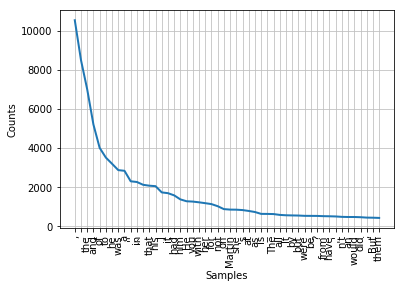

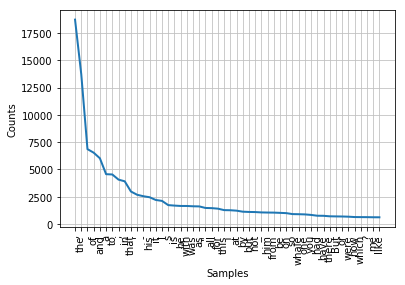

Words in tokens1 list but not in tokens2 list
["''", '``', 'He', 'her', 'Martin', 'she', "'s", 'The', 'It', "n't", 'an', 'would', 'did', 'them']

Words in tokens2 list but not in tokens1 list
['-', 's', '"', 'this', '!', 'so', 'whale', 'one', 'there', 'or', 'now', 'which', 'me', 'like']



In [52]:
#@markdown ###4. Use NLTK FreqDist to print and plot the most common words in your book 
#@markdown ###5. Compare the frequency to "Moby Dick" book in NLTK, What are the differences in the 50 most frequent words?
my_text_raw = all_tokens
example_text_raw = nltk.book.text1.tokens
print("Analysing My book and Example book (raw)")
plot_and_diff_most_common_words(my_text_raw, example_text_raw)

Analysing My book and Example book (cleaned)


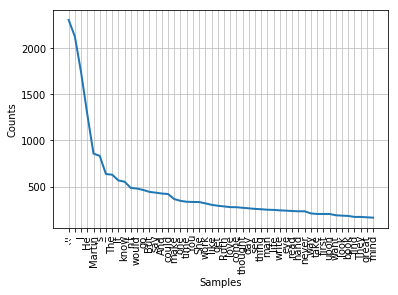

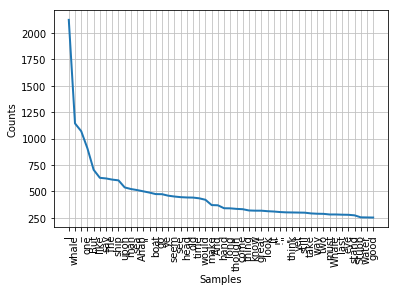

Words in tokens1 list but not in tokens2 list
["''", '``', 'He', 'Martin', "'s", "n't", 'could', 'You', 'She', 'work', 'get', 'Ruth', 'love', 'thought', 'day', 'life', 'write', 'read', 'never', 'first', 'want', 'book', 'find', 'They', 'mind']

Words in tokens2 list but not in tokens1 list
['whale', 'ship', 'sea', 'Ahab', '."', 'boat', 'ye', 'seem', 'head', 'old', 'long', 'though', '!"', ',"', 'think', 'yet', 'still', 'two', 'must', 'Whale', 'last', 'stand', 'Stubb', 'water', 'good']



In [53]:
#@markdown ###6. Repeat step 5, but first remove all stopwords, and apply lemmatization to the list of tokens
my_text_clean = clean_and_lemmatize(all_tokens, pos_tags_dictionary(unique_tokens))
example_text_clean = clean_and_lemmatize(example_text_raw, pos_tags_dictionary(example_text_raw))
print("Analysing My book and Example book (cleaned)")
plot_and_diff_most_common_words(my_text_clean, example_text_clean)

In [0]:
#@markdown ###8. Now create a positional index, with the paragraphs being the documents
pos_index = create_pos_index(unique_tokens, documents, documents_tokens, pos_tags_dictionary(unique_tokens))

In [55]:
#@markdown ###9. Implement simple search for 2 word phrase queries
#@markdown ###10. Do some example searches to show that the positional index works
#@markdown ###11. Bonus (optional for extra points): Apply POS (part-of-speech) tagging to the text, and search only for nouns and adjectives in the text.
print('Results of search "simple story":')
print(search_index(pos_index, 'simple', 'story'))  # should output {(80, 2729)}
print()
print('Results of search "Martin drank":')
print(search_index(pos_index, 'Martin', 'drank'))
print()

print("Text at document 80, words 2720 and beyond")  # as a proof for 'simple story' earlier
print("'" + documents[80][2720:] + "'")

Results of search "simple story":
{(80, 2729)}

Results of search "Martin drank":
{(91, 121), (86, 4737), (154, 798), (67, 2115)}

Text at document 80, words 2720 and beyond
'told the simple story, and more eloquently did the eyes, large
and bright, reflecting an unmistakable inward glory. "What has happened?" Mrs. Morse asked, having bided her time till Ruth
had gone to bed. "You know?" Ruth queried, with trembling lips. For reply, her mother's arm went around her, and a hand was softly
caressing her hair. "He did not speak," she blurted out. "I did not intend that it should
happen, and I would never have let him speak--only he didn't speak." "But if he did not speak, then nothing could have happened, could it?" "But it did, just the same." "In the name of goodness, child, what are you babbling about?" Mrs. Morse
was bewildered. "I don't think I know what happened, after all. What
did happen?" Ruth looked at her mother in surprise. "I thought you knew. Why, we're engaged, Martin and I